In [2]:
import pandas as pd
import plotly.graph_objs as go
import plotly.io as pio
from plotly.subplots import make_subplots

In [2]:
file_path = 'data/MetalPrices.xlsx'  
df = pd.read_excel(file_path)

In [3]:
colors = ['blue', 'red', 'green', 'purple']

In [4]:
traces = []
for i, metal in enumerate(df.columns[1:]):  
    trace = go.Scatter(
        x=df['Date'],
        y=df[metal],
        mode='lines',
        name=metal,
        line=dict(color=colors[i])  # Assigning a color to each trace
    )
    traces.append(trace)

In [6]:
layout = go.Layout(
    title='Prices of Metals Over Time',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Price')
)

In [7]:
fig = go.Figure(data=traces, layout=layout)

In [3]:
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots

In [11]:
pyo.plot(fig, filename='metals_prices.html')

'metals_prices.html'

In [12]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
for trace in traces:
    fig.add_trace(trace, secondary_y=False)
# Update layout for the chart

fig.update_layout(
    title='Prices of Metals Over Time',
    xaxis=dict(title='Date'),  # You might want to label this as 'Date' for monthly data
    yaxis=dict(title='Price')
)

In [4]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


Restarted Python 3.10.0

In [6]:
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots

In [4]:
file_path = 'data/MetalPrices.xlsx'  
df = pd.read_excel(file_path)

Creating Decomposition graphs for all four metals

In [7]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
decomposition = {}
for metal in df.columns[1:]:
    result = seasonal_decompose(df[metal], model='additive', period=12)  # Assuming monthly data with a yearly seasonality
    decomposition[metal] = result

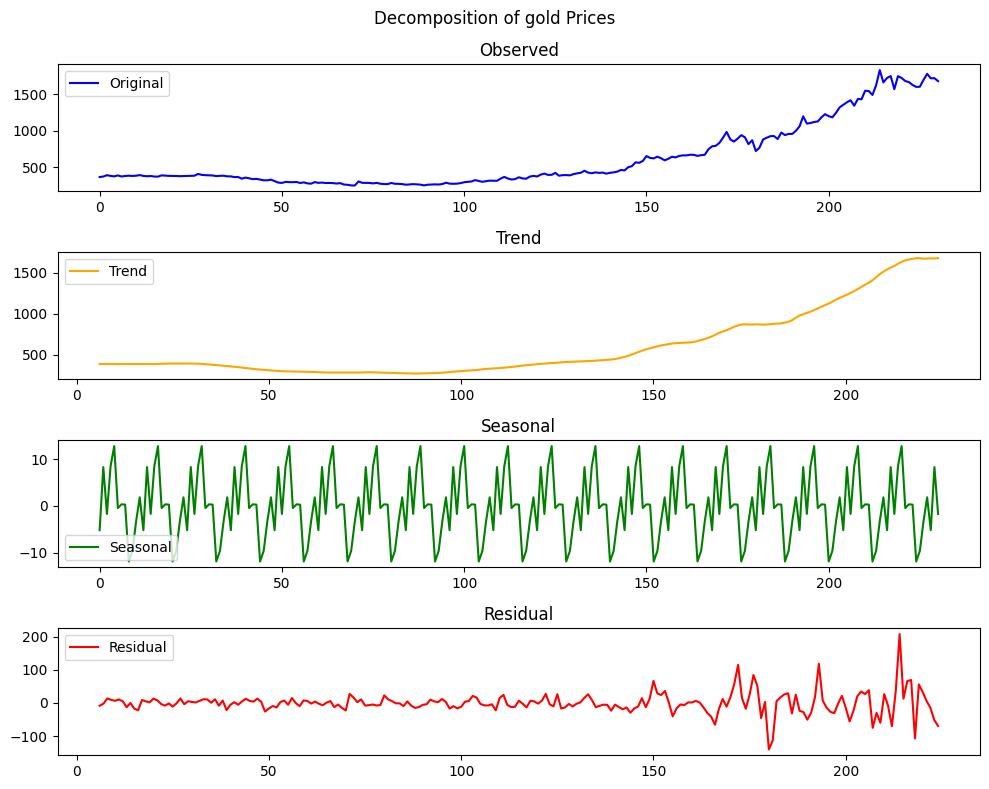

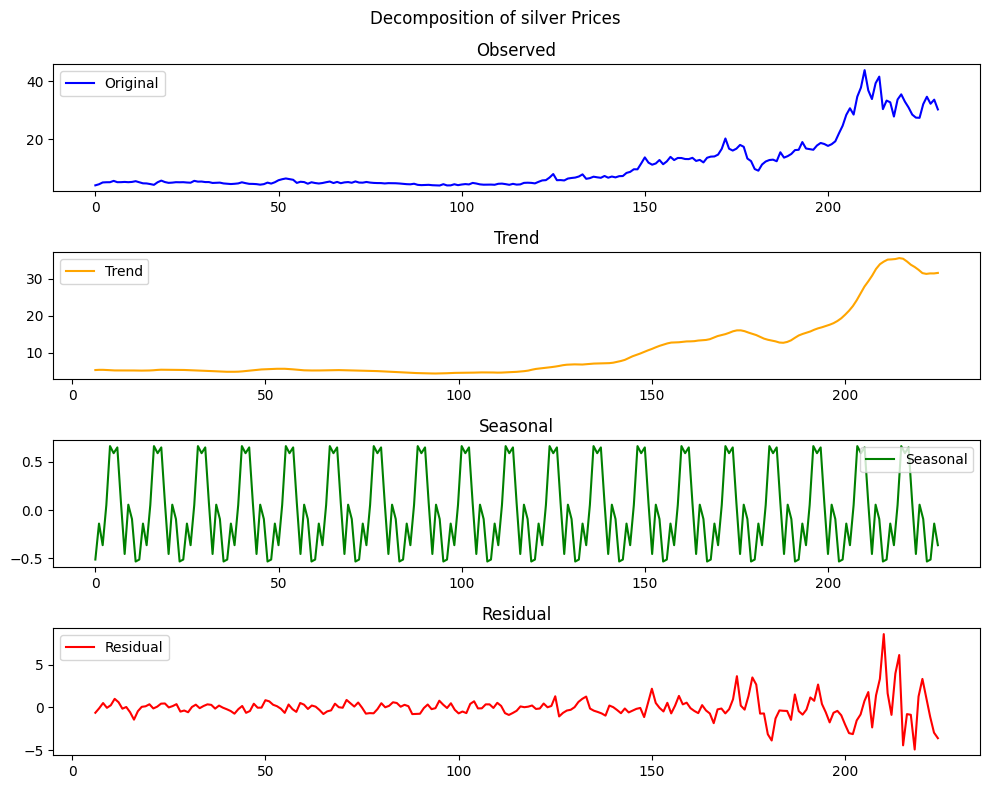

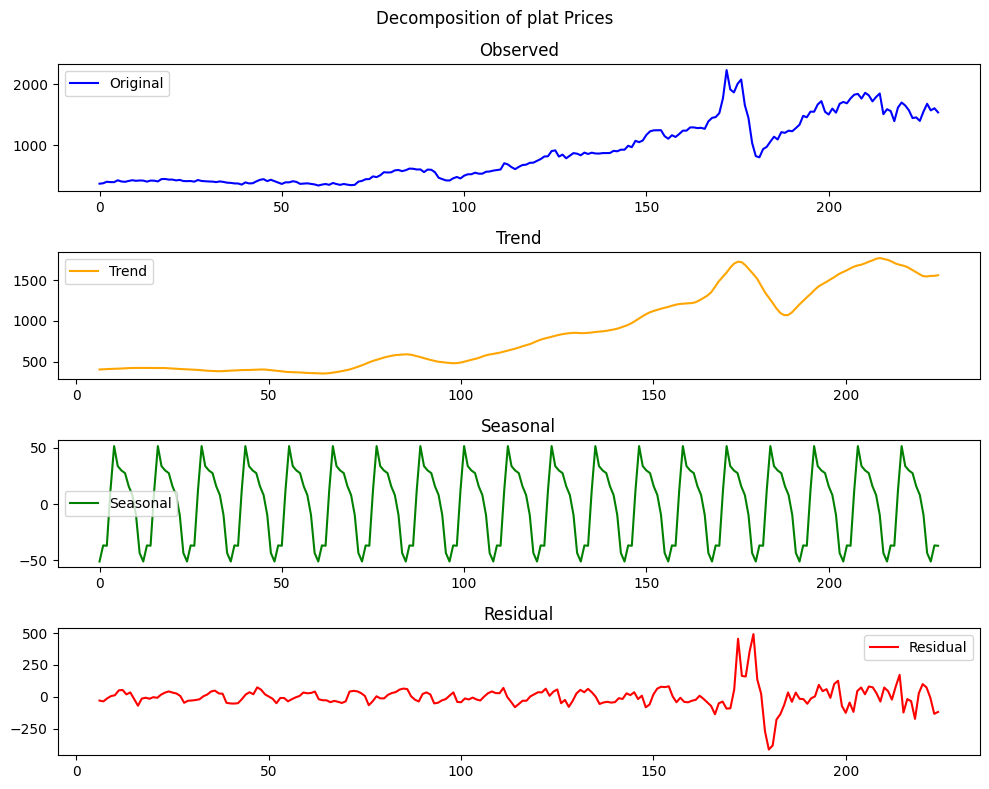

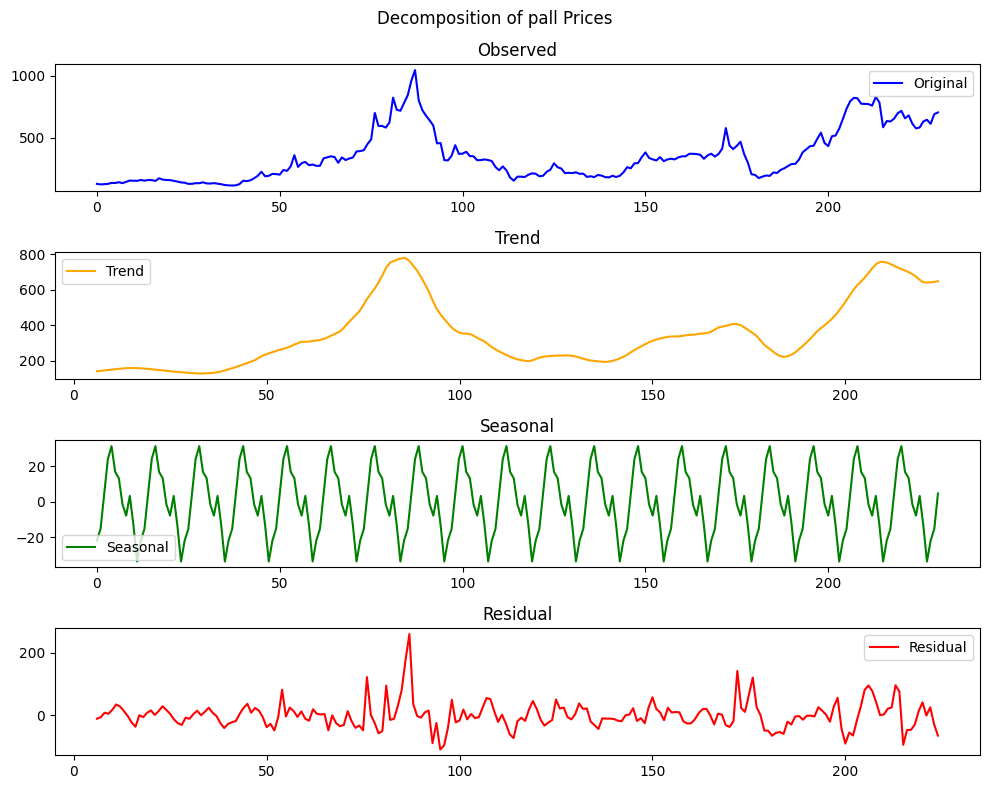

In [9]:
for metal, result in decomposition.items():
    fig, axes = plt.subplots(4, 1, figsize=(10, 8))
    fig.suptitle(f"Decomposition of {metal} Prices")
    axes[0].set_title('Observed')
    axes[0].plot(df[metal], label='Original', color='blue')
    axes[0].legend()
    axes[1].set_title('Trend')
    axes[1].plot(result.trend, label='Trend', color='orange')
    axes[1].legend()
    axes[2].set_title('Seasonal')
    axes[2].plot(result.seasonal, label='Seasonal', color='green')
    axes[2].legend()
    axes[3].set_title('Residual')
    axes[3].plot(result.resid, label='Residual', color='red')
    axes[3].legend()
    plt.tight_layout()
    plt.show()

All four metals (gold, silver, platinum, and palladium) have a non-linear trend.
Additive seasonality is found in all metals, and we can see irregular variation at the end of the series for thre metals (gold, silver, and platinum) and somewhere in the mid for palladium. 

Augmented Dickey Fuller(ADF) Test

In [8]:
from statsmodels.tsa.stattools import adfuller

In [18]:
adf_results = {}
for metal in df.columns[1:]:
    result = adfuller(df[metal], autolag='AIC')  # AIC is used to automatically select the lag
    adf_results[metal] = {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Critical Values (1%)': result[4]['1%'],
        'Critical Values (5%)': result[4]['5%'],
    }

In [19]:
adf_df = pd.DataFrame(adf_results).T
adf_df.index.name = 'Metal'

In [20]:
print(adf_df)

        ADF Statistic   p-value  Critical Values (1%)  Critical Values (5%)
Metal                                                                      
gold         2.059616  0.998746             -3.459885             -2.874531
silver       0.168849  0.970459             -3.459361             -2.874302
plat        -0.529538  0.886122             -3.460992             -2.875016
pall        -1.547001  0.510146             -3.459106             -2.874190


Augmented dickey fuller null hypothesis states that series is non-stationary, since the p-values indicates the acceptance of this null hypothesis, we can conclude that all four metals have non-stationary time series and hence need diffencing. 

In [ ]:
##Taking first difference
metal_prices = df.iloc[:, 1:]  
differenced_metal_prices = metal_prices.diff().dropna()

In [22]:
print(differenced_metal_prices.head())

    gold  silver  plat  pall
1   7.05    0.37   6.8 -4.75
2  17.70    0.62  25.0  2.25
3  -9.50    0.07  -6.0  2.00
4  -5.75    0.01  -0.5  7.85
5  12.25    0.46  30.5 -0.60


In [23]:
differenced_df_with_date = pd.concat([df.iloc[1:, 0], differenced_metal_prices], axis=1)

In [24]:
print(differenced_df_with_date.head())

        Date   gold  silver  plat  pall
1 1993-12-01   7.05    0.37   6.8 -4.75
2 1994-01-01  17.70    0.62  25.0  2.25
3 1994-02-01  -9.50    0.07  -6.0  2.00
4 1994-03-01  -5.75    0.01  -0.5  7.85
5 1994-04-01  12.25    0.46  30.5 -0.60


In [25]:
adf_results = {}
for metal in differenced_df_with_date.columns[1:]:
    result = adfuller(differenced_df_with_date[metal], autolag='AIC')  # AIC is used to automatically select the lag
    adf_results[metal] = {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Critical Values (1%)': result[4]['1%'],
        'Critical Values (5%)': result[4]['5%'],
    }

In [26]:
adf_df = pd.DataFrame(adf_results).T
adf_df.index.name = 'Metal'

In [27]:
print(adf_df)

        ADF Statistic       p-value  Critical Values (1%)  \
Metal                                                       
gold        -5.211894  8.313575e-06             -3.459885   
silver     -13.932279  5.064100e-26             -3.459361   
plat        -5.510079  1.981227e-06             -3.460992   
pall       -14.811478  2.027246e-27             -3.459233   

        Critical Values (5%)  
Metal                         
gold               -2.874531  
silver             -2.874302  
plat               -2.875016  
pall               -2.874245  


After the first-order differencing, all p-values are lower 0.01 level of significance, hence we reject the null hypothesis of ADF, and conclude that all four metals have stationary series now. 

Differenced Series Plots

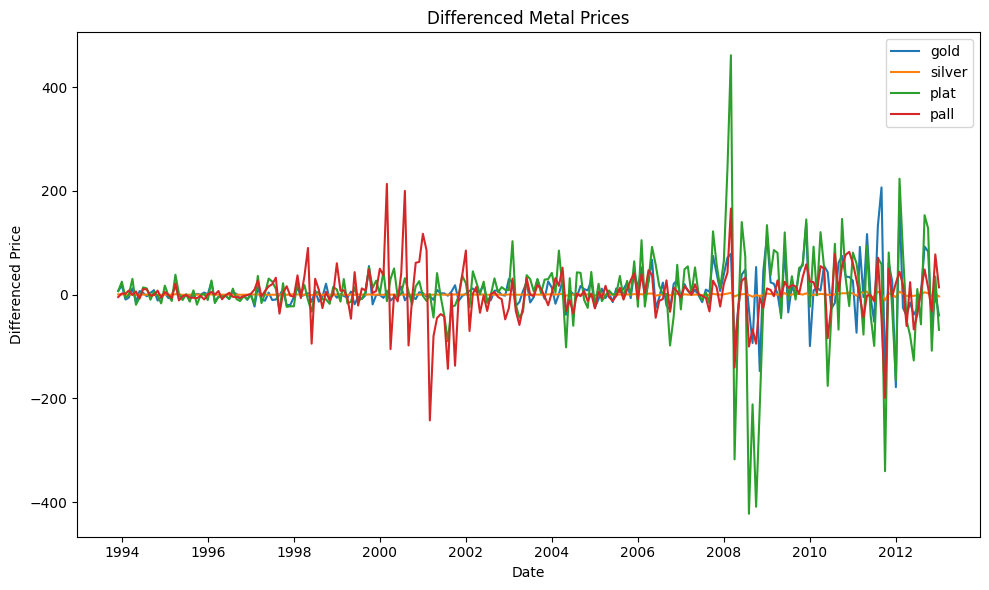

In [28]:
plt.figure(figsize=(10, 6))
for column in differenced_df_with_date.columns[1:]:
    plt.plot(differenced_df_with_date.iloc[:, 0], differenced_df_with_date[column], label=column)

plt.title('Differenced Metal Prices')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.legend()
plt.tight_layout()
plt.show()

We can observed that all series now have zero mean.

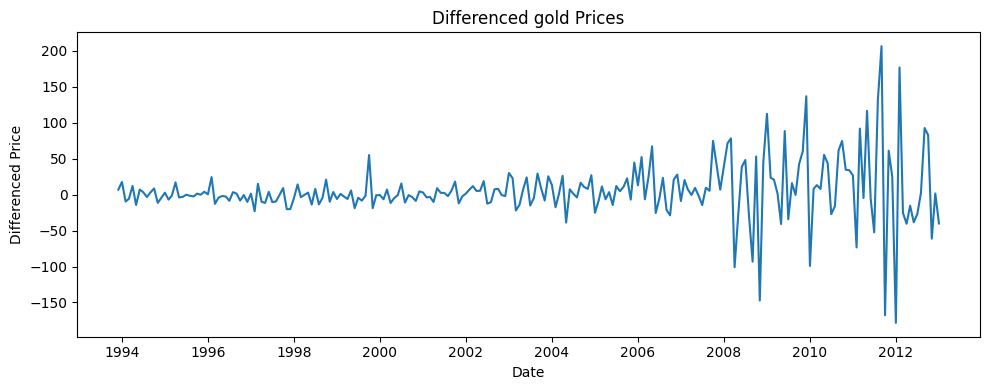

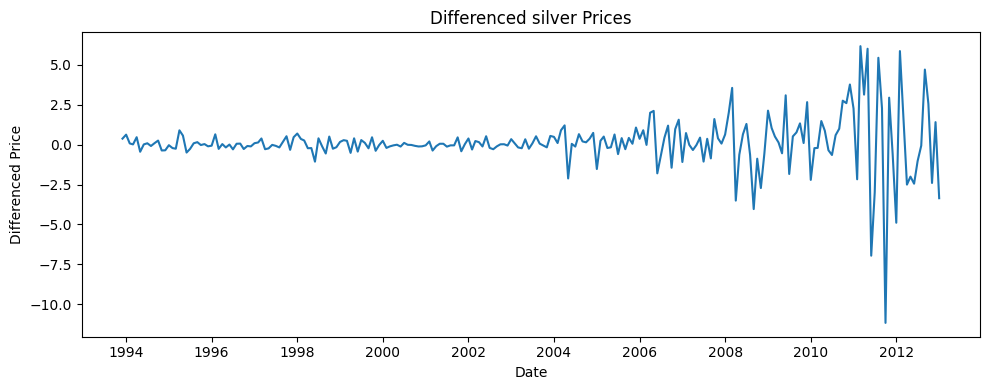

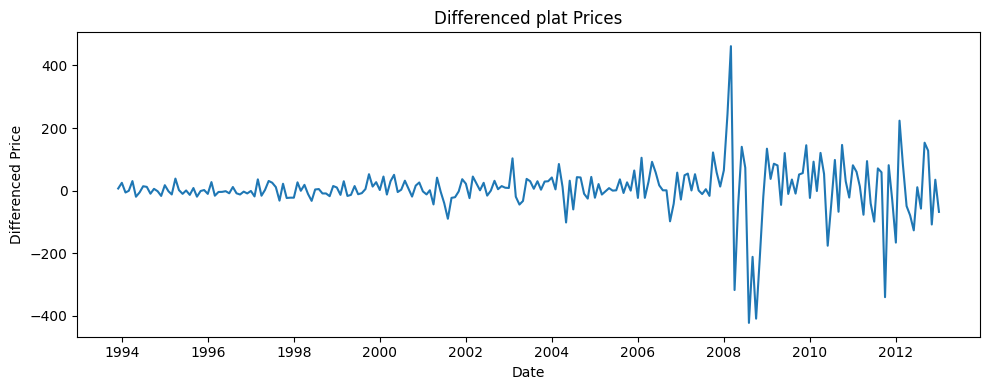

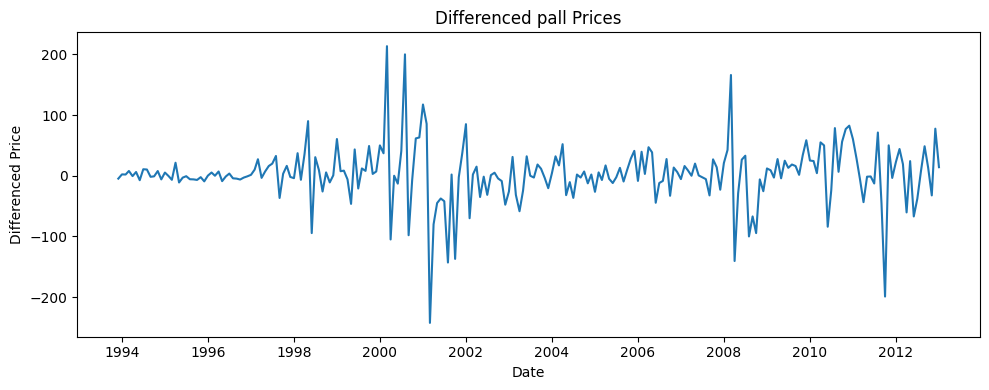

In [29]:
##Separate graphs for all four metals
for column in differenced_df_with_date.columns[1:]:
    plt.figure(figsize=(10, 4))
    plt.plot(differenced_df_with_date.iloc[:, 0], differenced_df_with_date[column])
    plt.title(f'Differenced {column} Prices')
    plt.xlabel('Date')
    plt.ylabel('Differenced Price')
    plt.tight_layout()
    plt.show()

ACF and PACF Plots

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

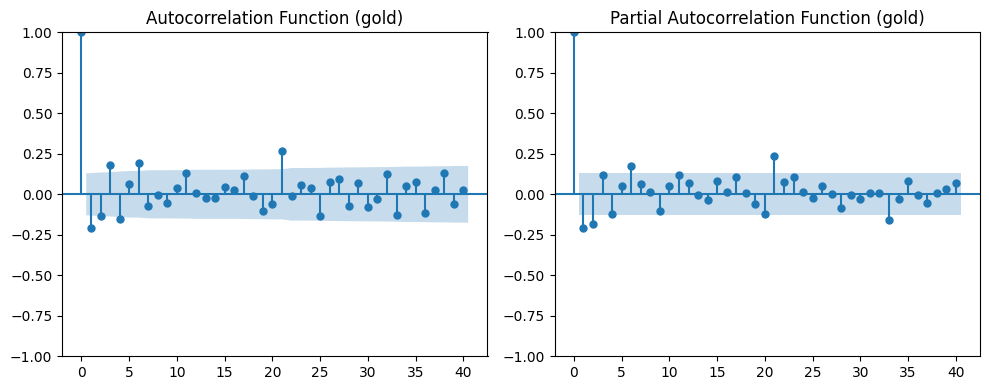

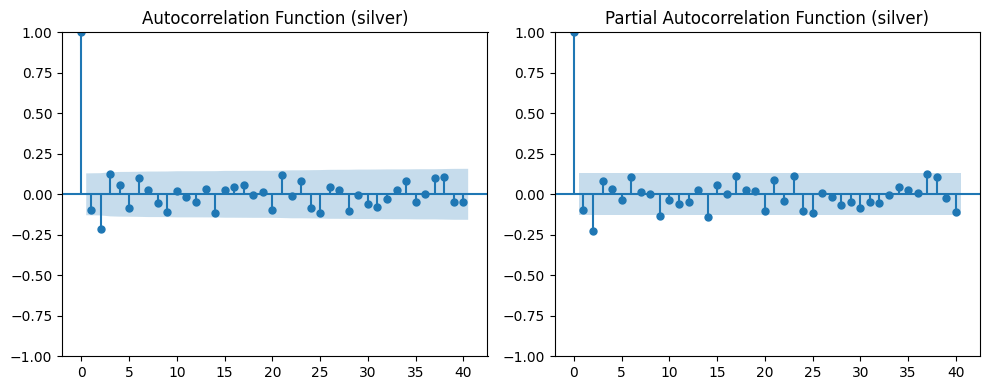

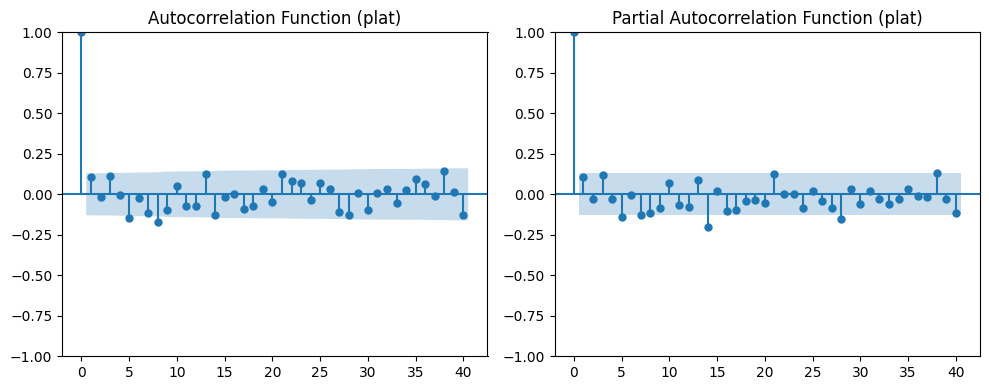

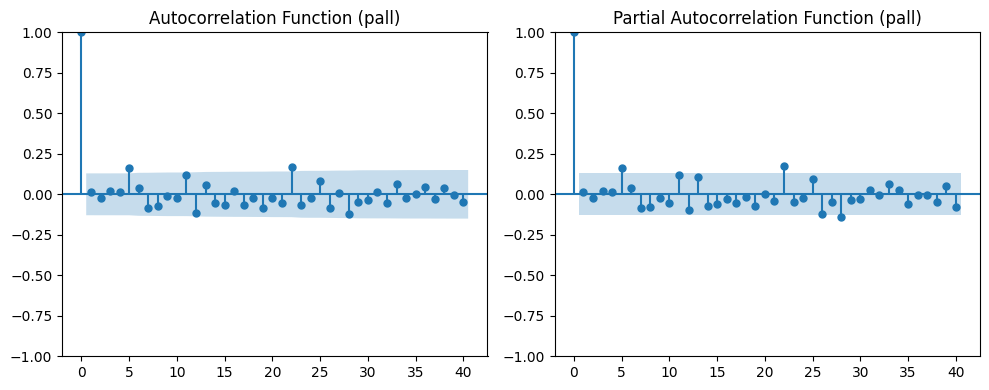

In [31]:
for column in differenced_df_with_date.columns[1:]:
    plt.figure(figsize=(10, 4))
    # ACF plot
    plt.subplot(1, 2, 1)
    plot_acf(differenced_df_with_date[column].dropna(), ax=plt.gca(), lags=40)
    plt.title(f'Autocorrelation Function ({column})')
    # PACF plot
    plt.subplot(1, 2, 2)
    plot_pacf(differenced_df_with_date[column].dropna(), ax=plt.gca(), lags=40)
    plt.title(f'Partial Autocorrelation Function ({column})')
    plt.tight_layout()
    plt.show()

Autoregressive Models

In [15]:
from statsmodels.tsa.arima.model import ARIMA 

In [42]:
ar_orders = [1, 2, 3, 4, 5]

In [43]:
for column in differenced_df_with_date.columns[1:]:
    print(f"Metal: {column}")
    for ar_order in ar_orders:
        try:
            model = ARIMA(differenced_df_with_date[column], order=(ar_order, 0, 0))  # AR order, no differencing, no MA
            results = model.fit()
            print(f"AR({ar_order}) - AIC: {results.aic}, BIC: {results.bic}")
        except:
            print(f"AR({ar_order}) - Model could not converge.")

Metal: gold
AR(1) - AIC: 2359.110458970006, BIC: 2369.424696896776
AR(2) - AIC: 2353.1642683048217, BIC: 2366.9165855405145
AR(3) - AIC: 2351.9072139593272, BIC: 2369.097610503943
AR(4) - AIC: 2350.481317954526, BIC: 2371.109793808065
AR(5) - AIC: 2351.7155865045543, BIC: 2375.7821416670167
Metal: silver
AR(1) - AIC: 883.2464221736693, BIC: 893.5606601004389
AR(2) - AIC: 873.1447793333232, BIC: 886.897096569016
AR(3) - AIC: 873.5026162620966, BIC: 890.6930128067125
AR(4) - AIC: 875.354050098315, BIC: 895.9825259518542
AR(5) - AIC: 877.1466425095782, BIC: 901.2131976720406
Metal: plat
AR(1) - AIC: 2680.1407908093092, BIC: 2690.455028736079
AR(2) - AIC: 2681.9334126087483, BIC: 2695.685729844441
AR(3) - AIC: 2680.456025794679, BIC: 2697.646422339295
AR(4) - AIC: 2682.191068923039, BIC: 2702.8195447765784
AR(5) - AIC: 2679.5798206956933, BIC: 2703.646375858156
Metal: pall
AR(1) - AIC: 2442.2609652461215, BIC: 2452.575203172891
AR(2) - AIC: 2444.139078849985, BIC: 2457.8913960856776
AR(3) 

In [47]:
differenced_df_with_date

,Date,gold,silver,plat,pall
1,1993-12-01,7.05,0.3700,6.80,-4.75
2,1994-01-01,17.70,0.6200,25.00,2.25
3,1994-02-01,-9.50,0.0700,-6.00,2.00
4,1994-03-01,-5.75,0.0100,-0.50,7.85
5,1994-04-01,12.25,0.4600,30.50,-0.60
...,...,...,...,...,...
226,2012-09-01,92.75,4.6900,153.15,48.57
227,2012-10-01,83.10,2.5450,127.65,13.47
228,2012-11-01,-61.23,-2.4025,-108.17,-32.40
229,2012-12-01,1.76,1.4025,34.82,77.55


In [56]:
model = ARIMA(differenced_df_with_date['gold'], order=(4, 1, 0))  
results = model.fit()

In [57]:
fitted_values = results.fittedvalues

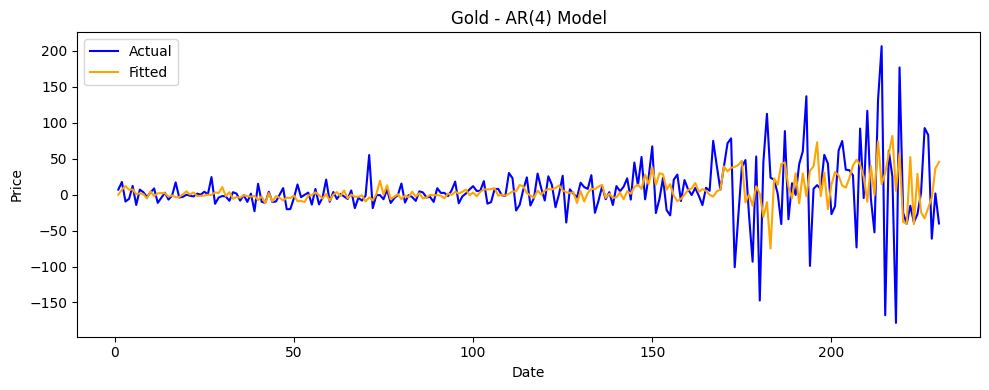

In [59]:
plt.figure(figsize=(10, 4))
plt.plot(differenced_df_with_date['gold'], label='Actual', color='blue')
plt.plot(fitted_values, label='Fitted', color='orange')
plt.title("Gold - AR(4) Model")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

In [63]:
model = ARIMA(differenced_df_with_date['silver'], order=(2, 1, 0))  
results = model.fit()
# Get the fitted values

fitted_values = results.fittedvalues

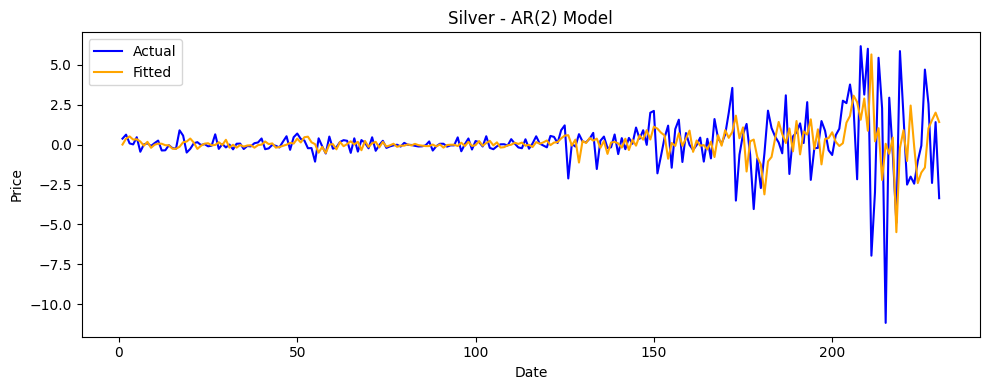

In [64]:
plt.figure(figsize=(10, 4))
plt.plot(differenced_df_with_date['silver'], label='Actual', color='blue')
plt.plot(fitted_values, label='Fitted', color='orange')
plt.title("Silver - AR(2) Model")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

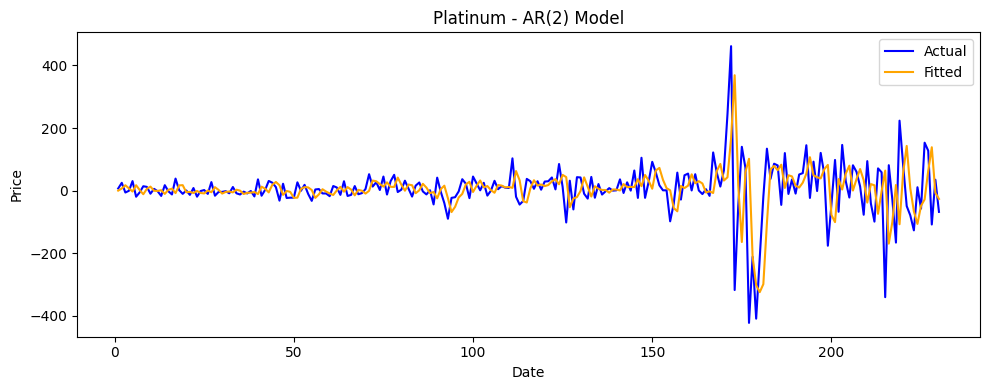

In [66]:
model = ARIMA(differenced_df_with_date['plat'], order=(1, 1, 0))  
results = model.fit()
# Get the fitted values

fitted_values = results.fittedvalues
plt.figure(figsize=(10, 4))
plt.plot(differenced_df_with_date['plat'], label='Actual', color='blue')
plt.plot(fitted_values, label='Fitted', color='orange')
plt.title("Platinum - AR(2) Model")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

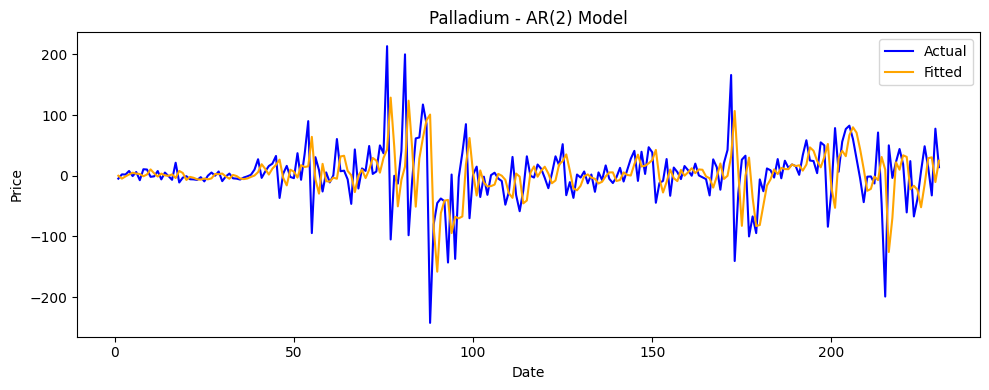

In [67]:
model = ARIMA(differenced_df_with_date['pall'], order=(1, 1, 0))  
results = model.fit()
# Get the fitted values

fitted_values = results.fittedvalues
plt.figure(figsize=(10, 4))
plt.plot(differenced_df_with_date['pall'], label='Actual', color='blue')
plt.plot(fitted_values, label='Fitted', color='orange')
plt.title("Palladium - AR(2) Model")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

Moving Average Models

In [68]:
ma_orders = [1, 2, 3, 4, 5]
# Fit MA models for each metal price field for different MA orders

for column in differenced_df_with_date.columns[1:]:
    print(f"Metal: {column}")
    for ma_order in ma_orders:
        try:
            model = ARIMA(differenced_df_with_date[column], order=(0, 0, ma_order))  # No AR, no differencing, MA order
            results = model.fit()
            print(f"MA({ma_order}) - AIC: {results.aic}, BIC: {results.bic}")
        except:
            print(f"MA({ma_order}) - Model could not converge.")

Metal: gold
MA(1) - AIC: 2355.7146567270975, BIC: 2366.028894653867
MA(2) - AIC: 2356.500295010937, BIC: 2370.2526122466297
MA(3) - AIC: 2352.4965878312096, BIC: 2369.6869843758254
MA(4) - AIC: 2354.2451649462946, BIC: 2374.873640799834
MA(5) - AIC: 2352.1860366230303, BIC: 2376.2525917854928
Metal: silver
MA(1) - AIC: 881.7431066357542, BIC: 892.0573445625238
MA(2) - AIC: 876.1067995087656, BIC: 889.8591167444583
MA(3) - AIC: 875.1522194815209, BIC: 892.3426160261369
MA(4) - AIC: 874.7815591540906, BIC: 895.4100350076297
MA(5) - AIC: 876.5514494453364, BIC: 900.6180046077988
Metal: plat
MA(1) - AIC: 2679.928704839358, BIC: 2690.2429427661277
MA(2) - AIC: 2681.4947992996695, BIC: 2695.2471165353622
MA(3) - AIC: 2680.928277867351, BIC: 2698.118674411967
MA(4) - AIC: 2682.2261074473063, BIC: 2702.8545833008457
MA(5) - AIC: 2680.5689560177484, BIC: 2704.635511180211
Metal: pall
MA(1) - AIC: 2442.2577606310588, BIC: 2452.5719985578285
MA(2) - AIC: 2444.132995560297, BIC: 2457.8853127959896

In [69]:
model = ARIMA(differenced_df_with_date['gold'], order=(0, 1, 5))  # No AR, first-order differencing, MA order
results = model.fit()
# Get the fitted values

fitted_values = results.fittedvalues

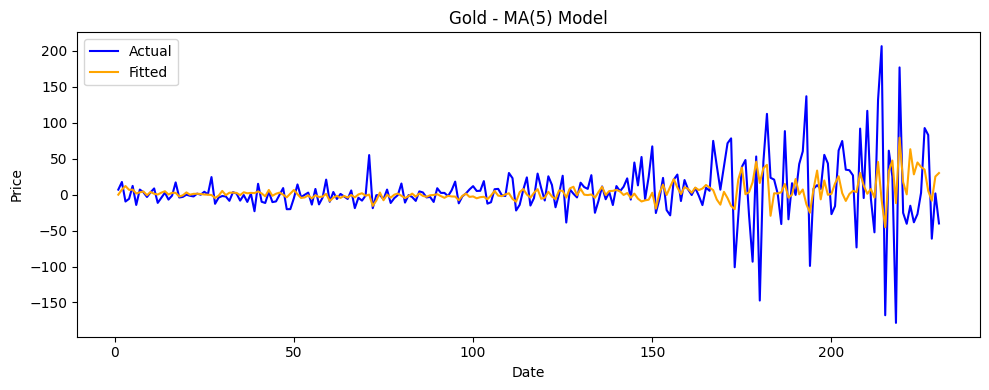

In [70]:
plt.figure(figsize=(10, 4))
plt.plot(differenced_df_with_date['gold'], label='Actual', color='blue')
plt.plot(fitted_values, label='Fitted', color='orange')
plt.title("Gold - MA(5) Model")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

c:\Users\ayesha.amjad\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



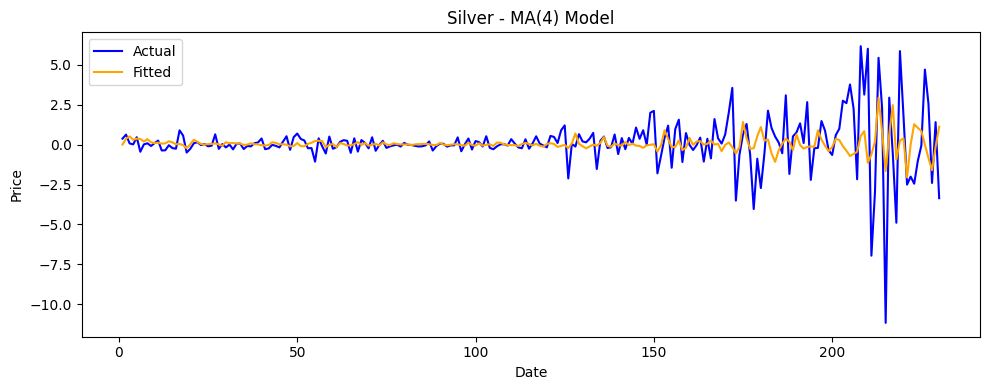

In [74]:
model = ARIMA(differenced_df_with_date['silver'], order=(0, 1, 5))  # No AR, first-order differencing, MA order
results = model.fit()
# Get the fitted values

fitted_values = results.fittedvalues
plt.figure(figsize=(10, 4))
plt.plot(differenced_df_with_date['silver'], label='Actual', color='blue')
plt.plot(fitted_values, label='Fitted', color='orange')
plt.title("Silver - MA(4) Model")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

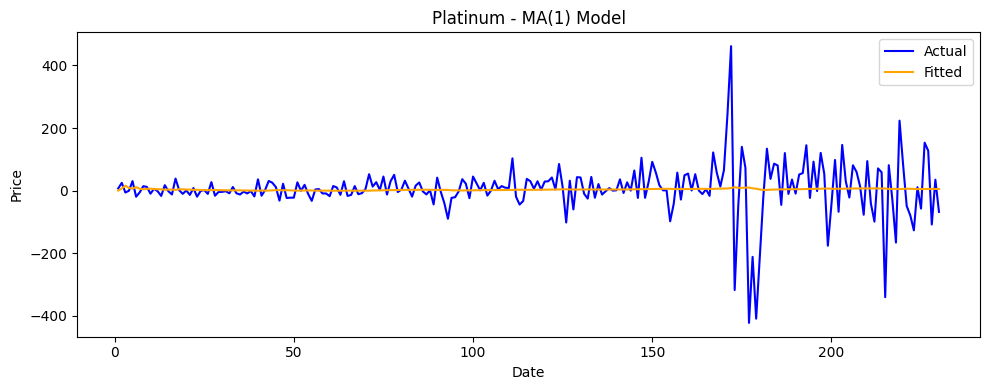

In [76]:
model = ARIMA(differenced_df_with_date['plat'], order=(0, 1, 1))  # No AR, first-order differencing, MA order
results = model.fit()
# Get the fitted values

fitted_values = results.fittedvalues
plt.figure(figsize=(10, 4))
plt.plot(differenced_df_with_date['plat'], label='Actual', color='blue')
plt.plot(fitted_values, label='Fitted', color='orange')
plt.title("Platinum - MA(1) Model")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

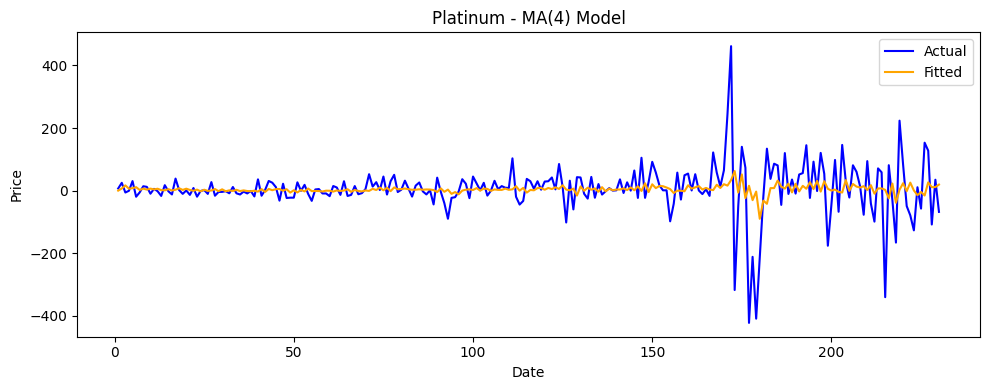

In [79]:
model = ARIMA(differenced_df_with_date['plat'], order=(0, 1, 4))  # No AR, first-order differencing, MA order
results = model.fit()
# Get the fitted values

fitted_values = results.fittedvalues
plt.figure(figsize=(10, 4))
plt.plot(differenced_df_with_date['plat'], label='Actual', color='blue')
plt.plot(fitted_values, label='Fitted', color='orange')
plt.title("Platinum - MA(4) Model")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

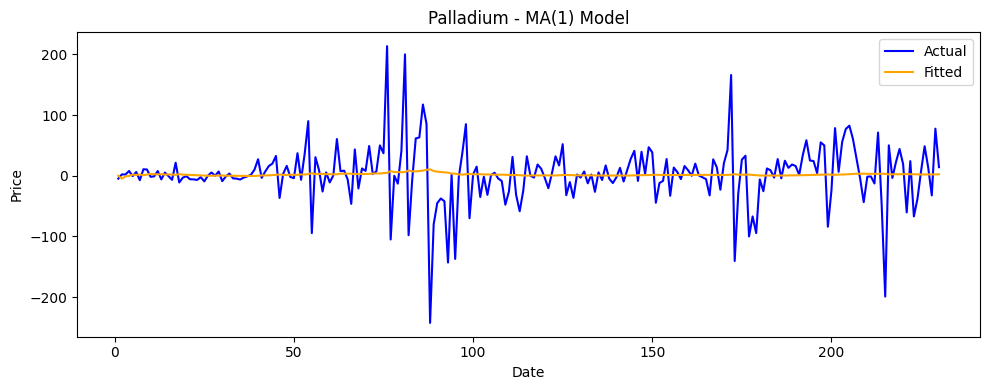

In [81]:
model = ARIMA(differenced_df_with_date['pall'], order=(0, 1, 1))  # No AR, first-order differencing, MA order
results = model.fit()
# Get the fitted values

fitted_values = results.fittedvalues
plt.figure(figsize=(10, 4))
plt.plot(differenced_df_with_date['pall'], label='Actual', color='blue')
plt.plot(fitted_values, label='Fitted', color='orange')
plt.title("Palladium - MA(1) Model")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

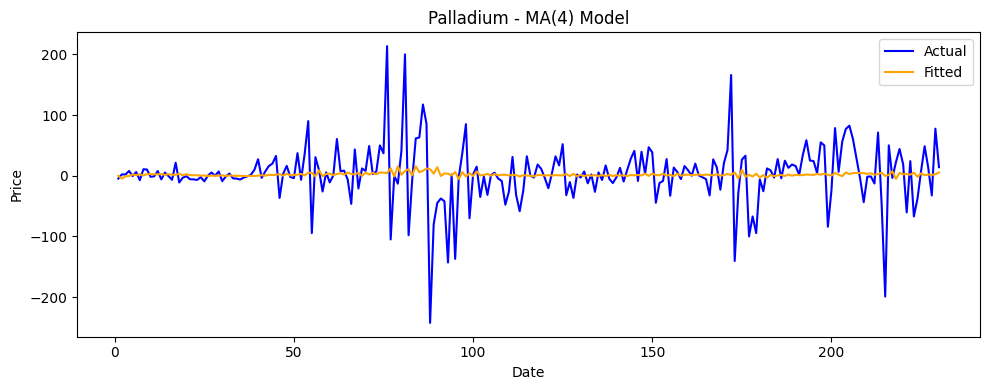

In [83]:
model = ARIMA(differenced_df_with_date['pall'], order=(0, 1, 4))  # No AR, first-order differencing, MA order
results = model.fit()
# Get the fitted values

fitted_values = results.fittedvalues
plt.figure(figsize=(10, 4))
plt.plot(differenced_df_with_date['pall'], label='Actual', color='blue')
plt.plot(fitted_values, label='Fitted', color='orange')
plt.title("Palladium - MA(4) Model")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

c:\Users\ayesha.amjad\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\ayesha.amjad\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



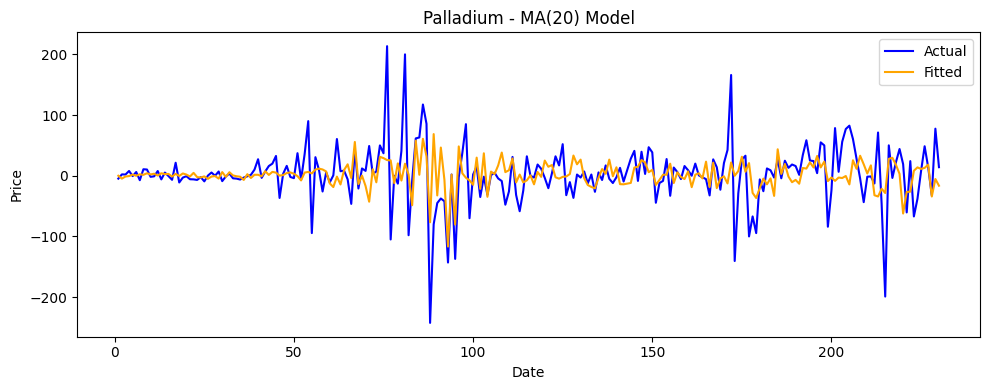

In [84]:
model = ARIMA(differenced_df_with_date['pall'], order=(0, 1, 20))  # No AR, first-order differencing, MA order
results = model.fit()
# Get the fitted values

fitted_values = results.fittedvalues
plt.figure(figsize=(10, 4))
plt.plot(differenced_df_with_date['pall'], label='Actual', color='blue')
plt.plot(fitted_values, label='Fitted', color='orange')
plt.title("Palladium - MA(20) Model")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

Higher q values for MA function are resulting in non-invertible starting MA parameters which can potentially lead to non-convergence

ARIMA Models on Gold Prices

In [91]:
p_values = range(0, 10)  
q_values = range(0, 10)  
best_aic = float('inf')
best_bic = float('inf')
best_p = 0
best_q = 0

In [92]:
for p in p_values:
    for q in q_values:
        try:
            model = ARIMA(differenced_df_with_date['gold'], order=(p, 0, q))
            results = model.fit()
            aic = results.aic
            bic = results.bic
            if aic < best_aic:
                best_aic = aic
                best_p = p
                best_q = q
            if bic < best_bic:
                best_bic = bic
                best_p_bic = p
                best_q_bic = q
        except:
            continue

c:\Users\ayesha.amjad\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\ayesha.amjad\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\ayesha.amjad\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\ayesha.amjad\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\ayesha.amjad\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Like

In [93]:
print(f"Best AIC Gold: p = {best_p}, q = {best_q}, AIC = {best_aic}")

Best AIC Gold: p = 5, q = 2, AIC = 2337.8551392917902


In [94]:
print(f"Best BIC Gold: p = {best_p_bic}, q = {best_q_bic}, BIC = {best_bic}")

Best BIC Gold: p = 0, q = 1, BIC = 2366.028894653867


In [95]:
for p in p_values:
    for q in q_values:
        try:
            model = ARIMA(differenced_df_with_date['gold'], order=(p, 1, q))
            results = model.fit()
            aic = results.aic
            bic = results.bic
            if aic < best_aic:
                best_aic = aic
                best_p = p
                best_q = q
            if bic < best_bic:
                best_bic = bic
                best_p_bic = p
                best_q_bic = q
        except:
            continue

c:\Users\ayesha.amjad\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\ayesha.amjad\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\ayesha.amjad\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\ayesha.amjad\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\ayesha.amjad\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: U

In [96]:
print(f"Best AIC Gold: p = {best_p}, q = {best_q}, AIC = {best_aic}")

Best AIC Gold: p = 4, q = 4, AIC = 2328.3360988119166


In [97]:
print(f"Best BIC Gold: p = {best_p_bic}, q = {best_q_bic}, BIC = {best_bic}")

Best BIC Gold: p = 2, q = 1, BIC = 2355.110718565154


c:\Users\ayesha.amjad\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



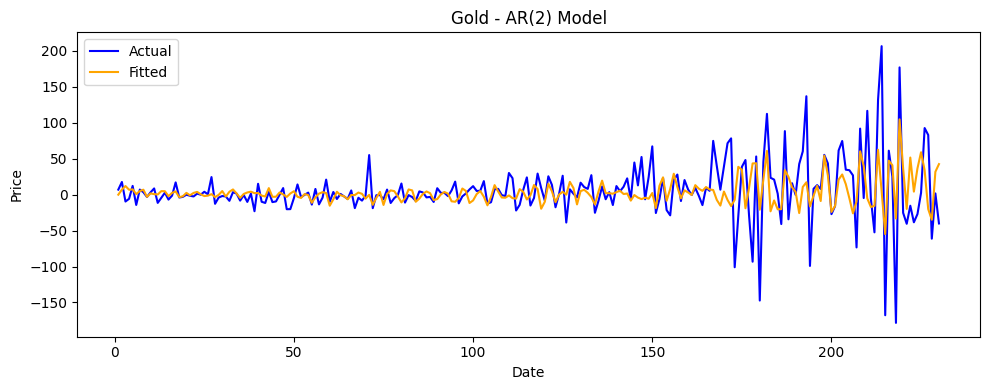

In [98]:
model = ARIMA(differenced_df_with_date['gold'], order=(4, 1, 4))  
results = model.fit()
# Get the fitted values

fitted_values = results.fittedvalues
plt.figure(figsize=(10, 4))
plt.plot(differenced_df_with_date['gold'], label='Actual', color='blue')
plt.plot(fitted_values, label='Fitted', color='orange')
plt.title("Gold - AR(2) Model")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

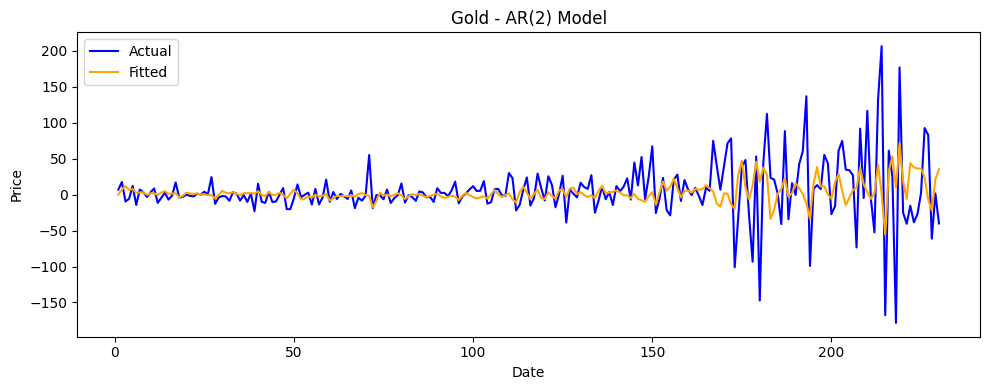

In [99]:
model = ARIMA(differenced_df_with_date['gold'], order=(2, 1, 1))  
results = model.fit()
# Get the fitted values

fitted_values = results.fittedvalues
plt.figure(figsize=(10, 4))
plt.plot(differenced_df_with_date['gold'], label='Actual', color='blue')
plt.plot(fitted_values, label='Fitted', color='orange')
plt.title("Gold - AR(2) Model")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

c:\Users\ayesha.amjad\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



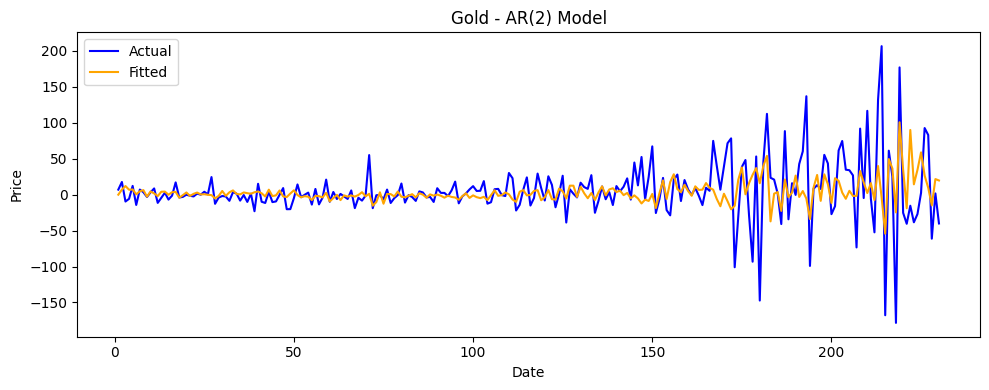

In [100]:
model = ARIMA(differenced_df_with_date['gold'], order=(5, 1, 2))  
results = model.fit()
# Get the fitted values

fitted_values = results.fittedvalues
plt.figure(figsize=(10, 4))
plt.plot(differenced_df_with_date['gold'], label='Actual', color='blue')
plt.plot(fitted_values, label='Fitted', color='orange')
plt.title("Gold - AR(2) Model")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

Seasonal ARIMA Models for GOLD Prices

In [109]:
file_path = 'data/MetalPrices.xlsx'  
df = pd.read_excel(file_path)

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [112]:
p_values = range(0, 5)  # Non-seasonal AR order
d_values = range(0, 2)  # Non-seasonal differencing
q_values = range(0, 5)  # Non-seasonal MA order
P_values = range(0, 5)  # Seasonal AR order
D_values = range(0, 2)  # Seasonal differencing
Q_values = range(0, 5)  # Seasonal MA order
m = 12  # monthly data, so m = 12 for annual seasonality

In [11]:
import itertools

In [115]:
parameter_combinations = list(itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values))

In [116]:
best_aic = float('inf')
best_bic = float('inf')
best_params = None

In [120]:
for param in parameter_combinations:
    try:
        model = SARIMAX(df['gold'], order=(param[0], param[1], param[2]), seasonal_order=(param[3], param[4], param[5], m))
        results = model.fit()
        aic = results.aic
        bic = results.bic
        if aic < best_aic:
            best_aic = aic
            best_params = param
        if bic < best_bic:
            best_bic = bic
    except:
        continue

c:\Users\ayesha.amjad\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

c:\Users\ayesha.amjad\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

c:\Users\ayesha.amjad\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

c:\Users\ayesha.amjad\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

c:\Users\ayesha.amjad\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:60

Comparing AR(4), MA(5), ARIMA(5,1,2), and SARIMA(5,1,2)(1, 1, 1, 12) Models for Gold Prices

In [12]:
file_path = 'data/MetalPrices.xlsx'  
df = pd.read_excel(file_path)
gold_prices = df['gold']  

In [18]:
# Fit AR(4) model
ar_model = ARIMA(gold_prices, order=(4, 0, 0))  # AR order = 4, no differencing, no MA
ar_results = ar_model.fit()
ar_fitted_values = ar_results.fittedvalues

# Fit MA(5) model
ma_model = ARIMA(gold_prices, order=(0, 0, 5))  # No AR, no differencing, MA order = 2
ma_results = ma_model.fit()
ma_fitted_values = ma_results.fittedvalues

# Fit ARIMA(5,1,2) model
arima_model = ARIMA(gold_prices, order=(5, 1, 2))  # AR order = 5, differencing = 1, MA order = 2
arima_results = arima_model.fit()
arima_fitted_values = arima_results.fittedvalues

# Fit SARIMA model
sarima_model = SARIMAX(gold_prices, order=(5, 1, 2), seasonal_order=(1, 1, 1, 12))  
sarima_results = sarima_model.fit()
sarima_fitted_values = sarima_results.fittedvalues

c:\Users\ayesha.amjad\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\ayesha.amjad\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\ayesha.amjad\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\ayesha.amjad\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\ayesha.amjad\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.p

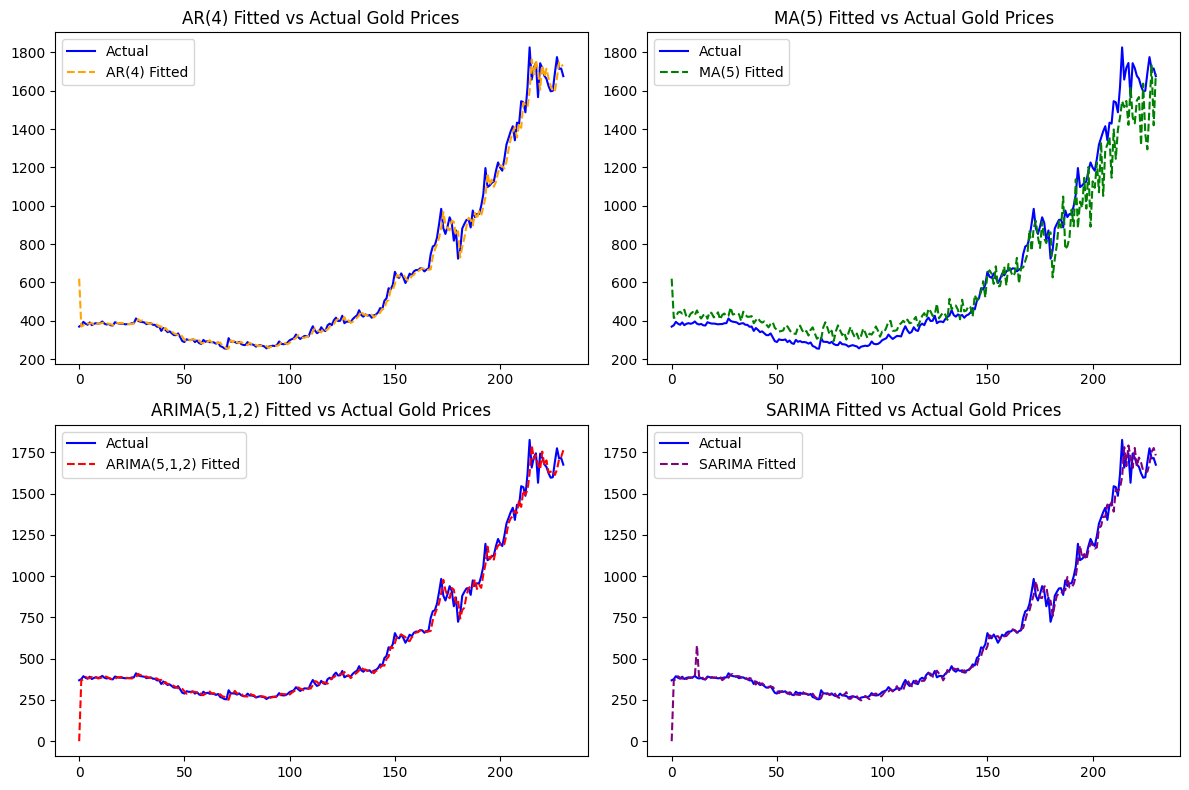

In [20]:
# Plot fitted vs actual gold prices for different models
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(gold_prices, label='Actual', color='blue')
plt.plot(ar_fitted_values, label='AR(4) Fitted', linestyle='--', color='orange')
plt.title('AR(4) Fitted vs Actual Gold Prices')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(gold_prices, label='Actual', color='blue')
plt.plot(ma_fitted_values, label='MA(5) Fitted', linestyle='--', color='green')
plt.title('MA(5) Fitted vs Actual Gold Prices')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(gold_prices, label='Actual', color='blue')
plt.plot(arima_fitted_values, label='ARIMA(5,1,2) Fitted', linestyle='--', color='red')
plt.title('ARIMA(5,1,2) Fitted vs Actual Gold Prices')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(gold_prices, label='Actual', color='blue')
plt.plot(sarima_fitted_values, label='SARIMA Fitted', linestyle='--', color='purple')
plt.title('SARIMA Fitted vs Actual Gold Prices')
plt.legend()

plt.tight_layout()
plt.show()